# Machine Learning Foundation

## Section 1, Part c: EDA Lab

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `iris_data.csv` found in the [data](data/) directory.

In [1]:
import os
import numpy as np
import pandas as pd

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [2]:
filepath = r'C:\Users\Thanh Huynh\Documents\Projects\github\IBM-Machine-Learning\data\iris_data.csv'
data = pd.read_csv(filepath)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# The number of data points (rows)
print(f'Number of rows: {data.shape[0]}\n')

# The column names
print(f'Column names: {list(data.columns)}\n')

# Data types for each columns
print(f'Data types for each column:\n{data.dtypes}')


Number of rows: 150

Column names: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

Data types for each column:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter. 

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [4]:
# Print out unique species
print(f"Unique species:\n{list(data['species'].unique())}")

Unique species:
['setosa', 'versicolor', 'virginica']


There is no prefix 'Iris-' in these names.

## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [5]:
# The number of each species present
print(f"Number of each species present:\n{data['species'].value_counts()}\n")

# The mean, median, and quantiles and ranges (max-min)
# for each petal and sepal measurement
data_des = data.describe()
data_des.rename({'50%':'median'}, inplace=True)
data_des.loc['range'] = data_des.loc['max'] - data_des.loc['min']
print(f"Data description:\n{data_des.loc[['mean', '25%', 'median', '75%', 'range']]}")


Number of each species present:
virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

Data description:
        sepal_length  sepal_width  petal_length  petal_width
mean        5.843333        3.054      3.758667     1.198667
25%         5.100000        2.800      1.600000     0.300000
median      5.800000        3.000      4.350000     1.300000
75%         6.400000        3.300      5.100000     1.800000
range       3.600000        2.400      5.900000     2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [6]:
# The mean of each measurement
print(f"Mean of each measurement by species:\n{data.groupby('species').mean()}\n")

# The median of each of these measurements
print(f"Median of each measurement by species:\n{data.groupby('species').median()}\n")

# Combine two tables
print(f"Mean and median of each measurement by species:\n{data.groupby('species').agg([np.mean, np.median])}")

Mean of each measurement by species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa             5.006        3.418         1.464        0.244
versicolor         5.936        2.770         4.260        1.326
virginica          6.588        2.974         5.552        2.026

Median of each measurement by species:
            sepal_length  sepal_width  petal_length  petal_width
species                                                         
setosa               5.0          3.4          1.50          0.2
versicolor           5.9          2.8          4.35          1.3
virginica            6.5          3.0          5.55          2.0

Mean and median of each measurement by species:
           sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setos

In [7]:
"""
# If certain fields need to be aggregated differently, we can do:
from pprint import pprint

agg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}
agg_dict['petal_length'] = 'max'
pprint(agg_dict)
data.groupby('species').agg(agg_dict)
"""

"\n# If certain fields need to be aggregated differently, we can do:\nfrom pprint import pprint\n\nagg_dict = {field: ['mean', 'median'] for field in data.columns if field != 'species'}\nagg_dict['petal_length'] = 'max'\npprint(agg_dict)\ndata.groupby('species').agg(agg_dict)\n"

## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [8]:
import matplotlib.pyplot as plt 
%matplotlib inline

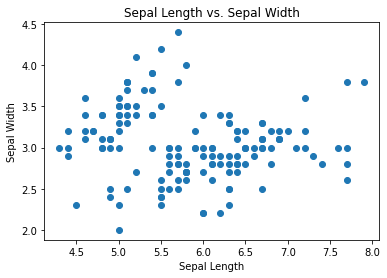

In [9]:
# Make a scatter plot of sepal_length vs sepal_width using Matplotlib
# Label the axes and give the plot a title
ax = plt.axes()
ax.scatter(x=data['sepal_length'], y=data['sepal_width'])
ax.set(xlabel='Sepal Length',
       ylabel='Sepal Width',
       title='Sepal Length vs. Sepal Width')
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate. 

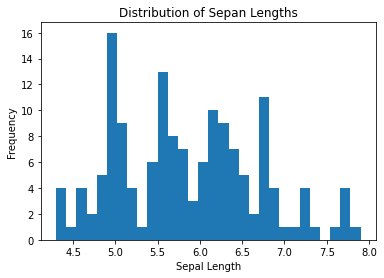

In [10]:
# Make a histogram of any one of the four features
# Label axes and title it as appropriate
ax = plt.axes()
ax.hist(data['sepal_length'], bins=30)
ax.set(xlabel='Sepal Length',
       ylabel='Frequency',
       title='Distribution of Sepan Lengths')
plt.show()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

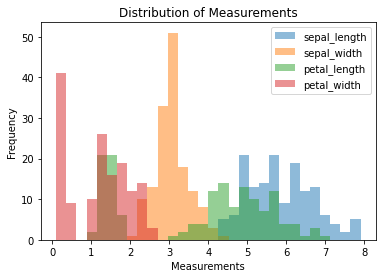

In [11]:
# Create a single plot with histograms for each feature
ax = data.plot.hist(bins=30, alpha=0.5)
ax.set(xlabel='Measurements',
       ylabel='Frequency',
       title='Distribution of Measurements')
plt.show()


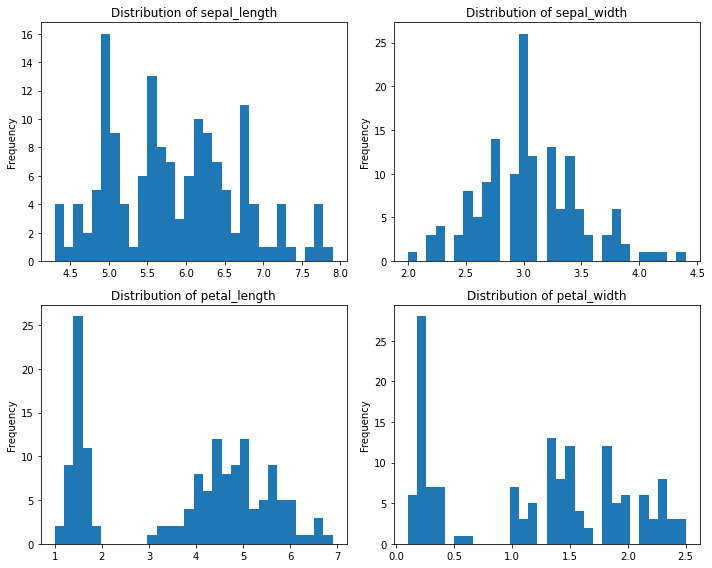

In [12]:
# Create four individual histogram plots in a single figure
fig, axes = plt.subplots(2,2, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    if i < 5:
        data[data.columns[i]].plot.hist(bins=30, ax=ax)
        ax.set(title=f"Distribution of {data.columns[i]}")
plt.tight_layout()

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

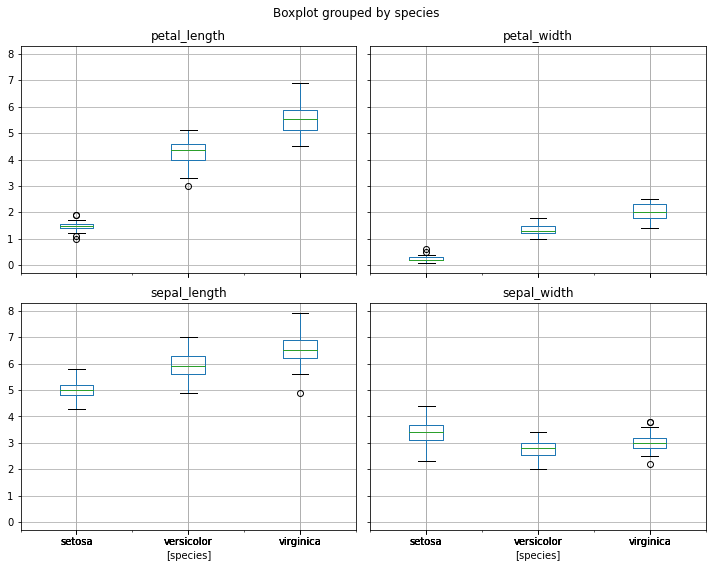

In [13]:
# Boxplot of each petal and sepal measurement
fig, axes = plt.subplots(figsize=(10,8))
data.boxplot(by='species', ax=axes)
plt.tight_layout()
plt.show()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues. 

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html). 

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

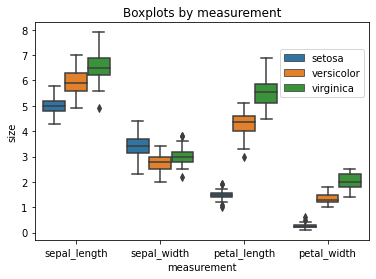

In [14]:
# Make a single boxplot where the features are separated
# in the x-axis and species are colored with different hues
import seaborn as sns
transformed_data = data.set_index('species').stack().reset_index().rename(columns={'level_1':'measurement', 0:'size'})
ax = sns.boxplot(data=transformed_data,
                 x='measurement',
                 y='size',
                 hue='species')
ax.set_title('Boxplots by measurement')
ax.legend(loc='best', bbox_to_anchor=(1, 0.9))
plt.show()


## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

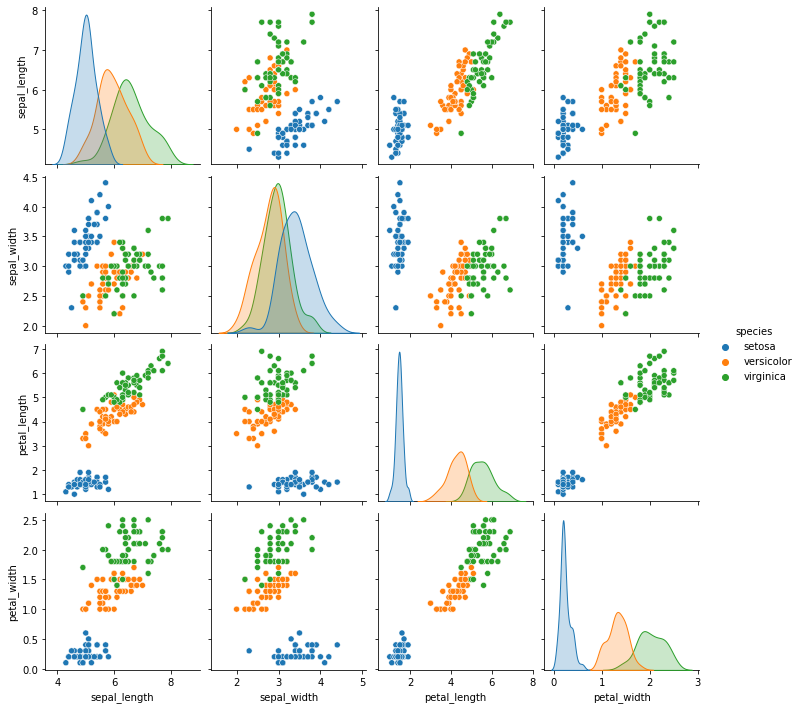

In [15]:
# Pair plot
sns.pairplot(data, hue='species');

---
### Machine Learning Foundation (C) 2020 IBM Corporation